In [42]:
#auto reload modules 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from cassie import CassieEnv
from constants import *
import mediapy as media
import functions as f 
import matplotlib.pyplot as plt

In [44]:
cassie = CassieEnv({})
cassie.render_mode = "rgb_array"
cassie.reset()
ranges=None

healthy z range:  (0.55, 2.0)


In [83]:
x = np.linspace(0, 1, 10000)

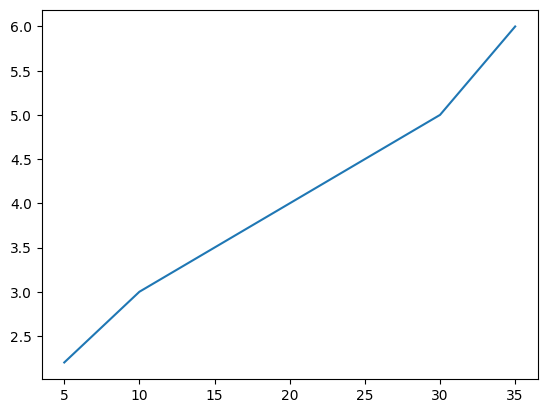

In [107]:
plot = np.array( [
 [5,2.2],
 [10,3],
 [30,5],
 [35,6]]).reshape(-1,2)

plt.plot(plot[:,0], plot[:,1])

In [156]:
reg = []
diffs = []
# fig, ax = plt.subplots(10,5,figsize=(16, 20), sharex=True, sharey=True)

for kappa in range(200):
    von_mises = f.p_between_von_mises(a = 0 , b = 0.5, kappa = kappa , x = x) 
    min_diff = np.inf
    min_u = 0
    for j in range(300):
        u = j/10.0
        approx =  1/2+1/2*(np.tanh(u*np.sin(2*np.pi*x)))
        diff = np.mean(np.abs(von_mises-approx))
        if diff < min_diff:
            min_diff = diff
            min_u = u
    reg.append([kappa,min_u])
    diffs.append(min_diff)
    # ax[kappa//5, kappa%5].plot(x, von_mises)
    # ax[kappa//5, kappa%5].plot(x, approx)

# plt.show()



In [155]:
reg

[[0, 0],
 [1, 0.6],
 [2, 1.1],
 [3, 1.5],
 [4, 1.8],
 [5, 2.0],
 [6, 2.2],
 [7, 2.3],
 [8, 2.5],
 [9, 2.6],
 [10, 2.8],
 [11, 2.9],
 [12, 3.0],
 [13, 3.1],
 [14, 3.2],
 [15, 3.4],
 [16, 3.5],
 [17, 3.6],
 [18, 3.7],
 [19, 3.8],
 [20, 3.9],
 [21, 3.9],
 [22, 4.0],
 [23, 4.1],
 [24, 4.2],
 [25, 4.3],
 [26, 4.4],
 [27, 4.5],
 [28, 4.5],
 [29, 4.6],
 [30, 4.7],
 [31, 4.8],
 [32, 4.9],
 [33, 4.9],
 [34, 5.0],
 [35, 5.1],
 [36, 5.1],
 [37, 5.2],
 [38, 5.3],
 [39, 5.3],
 [40, 5.4],
 [41, 5.5],
 [42, 5.5],
 [43, 5.6],
 [44, 5.7],
 [45, 5.7],
 [46, 5.8],
 [47, 5.9],
 [48, 5.9],
 [49, 6.0],
 [50, 6.0],
 [51, 6.1],
 [52, 6.2],
 [53, 6.2],
 [54, 6.3],
 [55, 6.3],
 [56, 6.4],
 [57, 6.5],
 [58, 6.5],
 [59, 6.6],
 [60, 6.6],
 [61, 6.7],
 [62, 6.7],
 [63, 6.8],
 [64, 6.8],
 [65, 6.9],
 [66, 6.9],
 [67, 7.0],
 [68, 7.0],
 [69, 7.1],
 [70, 7.1],
 [71, 7.2],
 [72, 7.2],
 [73, 7.3],
 [74, 7.3],
 [75, 7.4],
 [76, 7.4],
 [77, 7.5],
 [78, 7.5],
 [79, 7.6],
 [80, 7.6],
 [81, 7.7],
 [82, 7.7],
 [83, 7.8],
 [84

a = 6.072980079037679
b = 0.05573903726330689
c = -3.936458863461854
d = 2.365670701763357
The function to use is y = 6.072980 * log(0.055739 * x + 2.365671) + -3.936459


C:\Users\Ajvendetta\AppData\Local\Temp\ipykernel_36664\1194939621.py:7: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x+ d ) + c


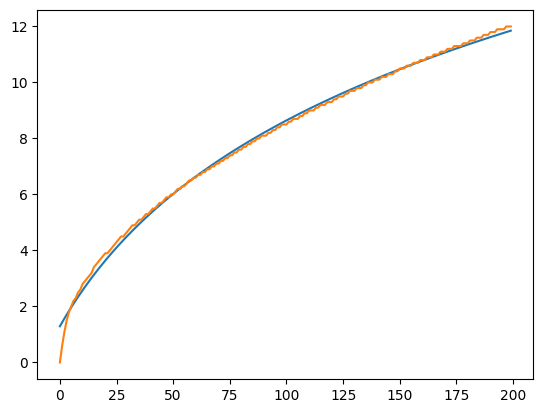

In [168]:
import numpy as np
from scipy.optimize import curve_fit
import math

# Define the logarithmic function
def logarithmic_func(x, a, b, c, d):
    return a * np.log(b * x+ d ) + c

# Input data
data = np.array(reg)

# Extract x and y values from the data
x_data = data[:, 0]
y_data = data[:, 1]

# Make sure x values are positive since we are using logarithms
x_data_positive = np.where(x_data > 0, x_data, 1e-10)

# Fit the data using the logarithmic function
params, _ = curve_fit(logarithmic_func, x_data_positive, y_data)

# Extract the coefficients
a, b, c,d= params

# Print the coefficients
print("a =", a)
print("b =", b)
print("c =", c)
print("d =", d)
plt.plot(x_data, logarithmic_func(x_data, a, b, c,d))
plt.plot(x_data, y_data)
print("The function to use is y = {:1f} * log({:1f} * x + {:1f}) + {:1f}".format(a, b, d, c))

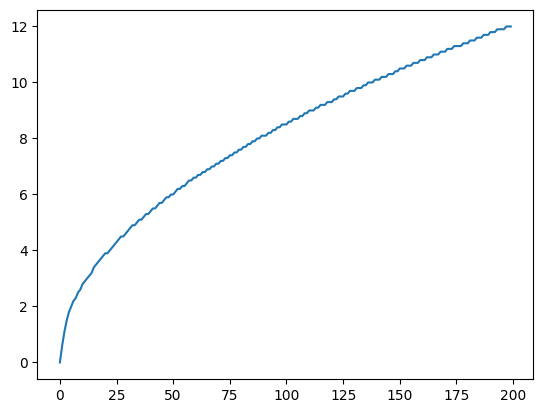

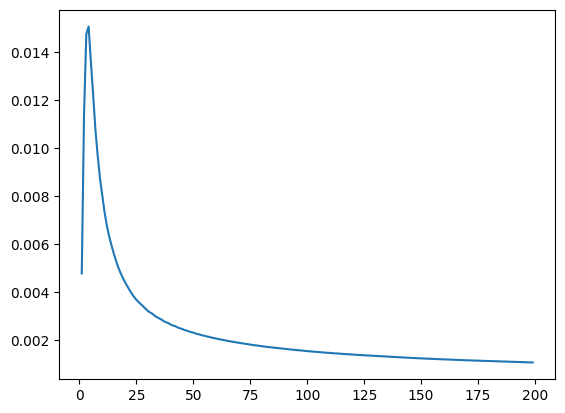

In [157]:
plt.plot(np.array(reg)[:,0], np.array(reg)[:,1])
plt.show()
plt.plot(diffs)

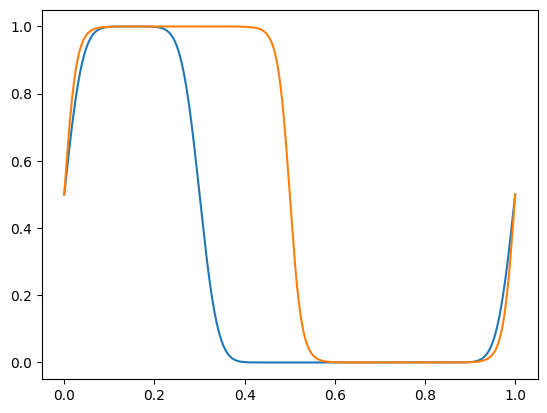

In [169]:

plt.plot(x,f.p_between_von_mises(a = 0 , b = 0.3, kappa = 25 , x = x) )
plt.plot(x, 1/2+1/2*(np.tanh(6*np.sin(2*np.pi*x))))

In [170]:
#detect ranges for each observation by moving the joints randomly and recording the min and max values

for i in range(10000):
    observation, reward, terminated, _, info = cassie.step(cassie.action_space.sample())
    if(i==0 and ranges is None):
        ranges = np.array([observation,observation],dtype=np.float16)
    else:
        ranges[0,:] = np.minimum(ranges[0,:],observation)
        ranges[1,:] = np.maximum(ranges[1,:],observation)


KeyboardInterrupt: 

In [ ]:
ranges

array([[-0.006393,  0.104   ,  0.004963,  0.0063  ,  0.02249 ,  0.3743  ,
         0.1114  ,  0.1134  ,  0.0427  ,  0.03833 ,  0.00585 , -0.00875 ,
        -0.007317,  0.353   ,  0.1127  ,  0.10693 ,  0.0484  ,  0.05722 ,
         0.00895 ,  0.00462 ,  0.0139  ,  0.007317,  0.02272 , -0.9946  ,
        -1.      ],
       [ 0.9917  ,  0.9985  ,  0.9897  ,  0.982   ,  0.9805  ,  0.642   ,
         0.8296  ,  0.969   ,  0.948   ,  0.9233  ,  0.9893  ,  0.979   ,
         0.995   ,  0.617   ,  0.827   ,  0.9824  ,  0.9375  ,  0.9434  ,
         0.9326  ,  1.      ,  0.9985  ,  0.998   ,  0.98    ,  0.9946  ,
         1.      ]], dtype=float16)

In [ ]:
cassie.reset()

(array([ 0.41429069,  0.54892648,  0.4021049 ,  0.81152428,  1.01151177,
         0.50272618,  0.2536014 ,  0.99695051,  0.56491006,  0.50455382,
         0.40355241,  0.81489018,  1.0178864 ,  0.49570261,  0.25133165,
         1.00228745,  0.50014579,  0.49043349,  0.50012739,  0.99998286,
         0.50246596,  0.50030956,  0.49668929, -0.40673664,  0.91354546]),
 {})

In [ ]:
obs_ranges = np.array([np.floor(ranges[0,:]),np.ceil(ranges[1,:])],np.float16)

In [ ]:
obs_ranges

array([[-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]],
      dtype=float16)

# Randomized moveoemnt 

healthy z range:  (0.55, 2.0)
0


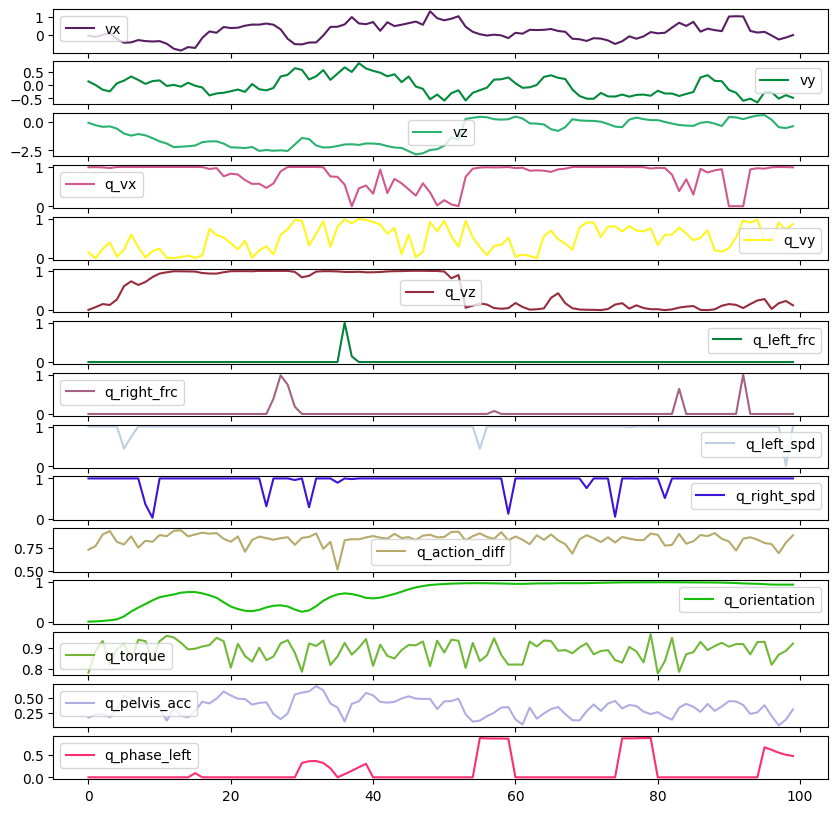

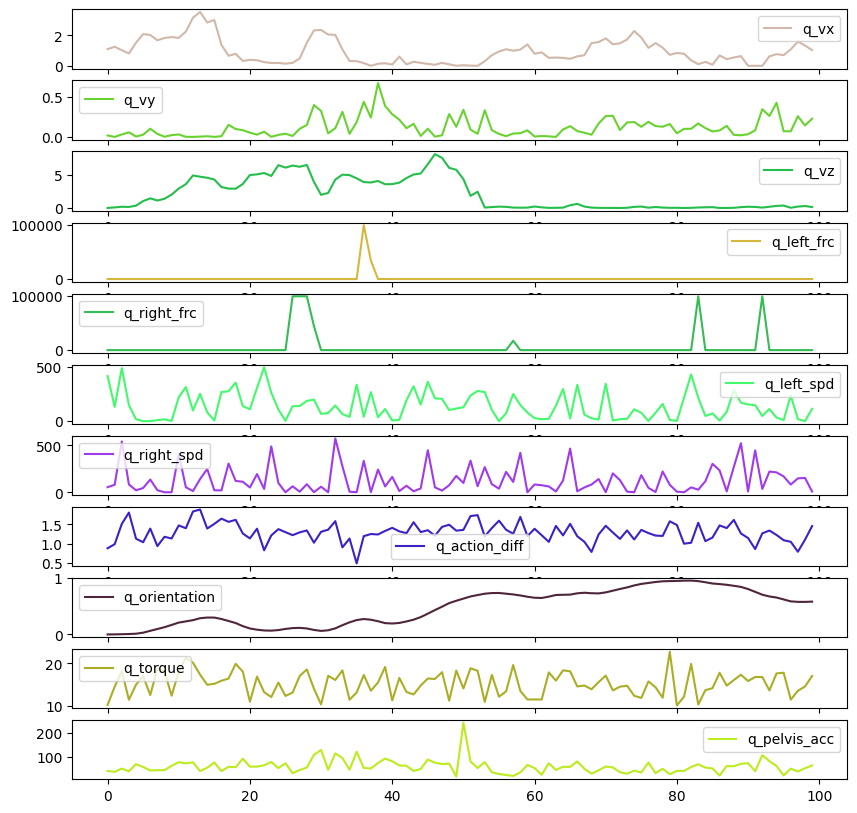

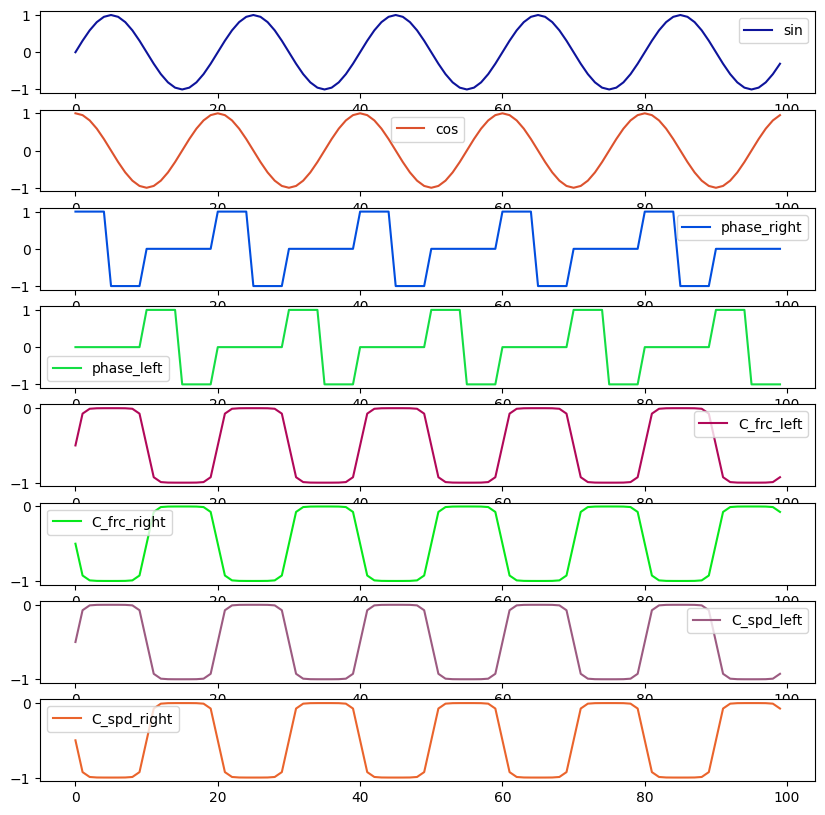

In [183]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv({})
obs,_ = env.reset(seed = np.random.randint(0,1000))
print(env.phi)
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []

C = {}
exponents = {}
max_steps = 100
number_of_rounds = 4
for i in range(max_steps):

    action = cassie.action_space.sample()
    obs, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)

    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)

env.close()
#save video 
media.show_video( frames, fps=30)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(C[metric], color=s)
    axs[i].legend([metric])

In [8]:
import loader as l 
loader = l.Loader()
config  = loader.load_config("dict_config_test.yaml")

{'gamma': 0.99, 'lr': 0.001, 'train_batch_size': 50000, 'model': {'fcnet_hiddens': [128, 128], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 9000, 'num_sgd_iter': 5, 'shuffle_sequences': True, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.3, 'kl_target': 0.01, 'vf_clip_param': 1000.0, 'env': 'cassie-v0', 'disable_env_checking': True, 'clip_actions': True, 'framework': 'torch', 'num_rollout_workers': 1, 'num_envs_per_worker': 1, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'recreate_failed_workers': True, 'observation_filter': 'MeanStdFilter', 'evaluation_interval': 2, 'evaluation_duration': 10, 'num_gpus': 0, 'num_cpus_per_worker': 1}


In [9]:
from ray.rllib.algorithms.ppo import PPOConfig
from cassie import CassieEnv, MyCallbacks
import constants as c 
import functions as f 
import numpy as np
import loader as l 
import caps as cp 
import torch
from ray.tune.registry import register_env

In [10]:
register_env("cassie-v0", lambda config: CassieEnv(config))

In [184]:

import ray 
ray.init(ignore_reinit_error=True)
trainer = PPOConfig().from_dict(config).build()


2023-05-29 01:24:19,348	INFO worker.py:1454 -- Calling ray.init() again after it has already been called.
(pid=2072)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
(pid=2072)   VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
2023-05-29 01:24:23,579	WARNING util.py:67 -- Install gputil for GPU system monitoring.


(RolloutWorker pid=2072) healthy z range:  (0.55, 2.0)
(RolloutWorker pid=2072) healthy z range:  (0.55, 2.0)
healthy z range:  (0.55, 2.0)


In [185]:
trainer.load_checkpoint("checkpoint_0001275")

Device is  cuda
healthy z range:  (0.55, 2.0)


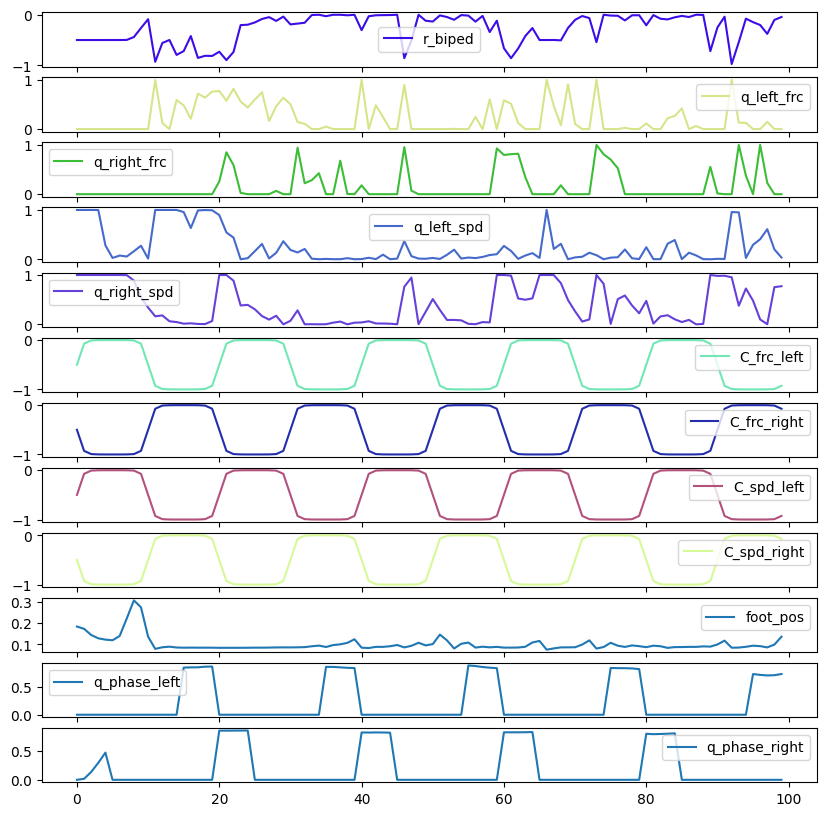

Left_Force mean  386345.0626547607 Std 814034.2842561878 max 3986257.7858206527 min 485.11124570545


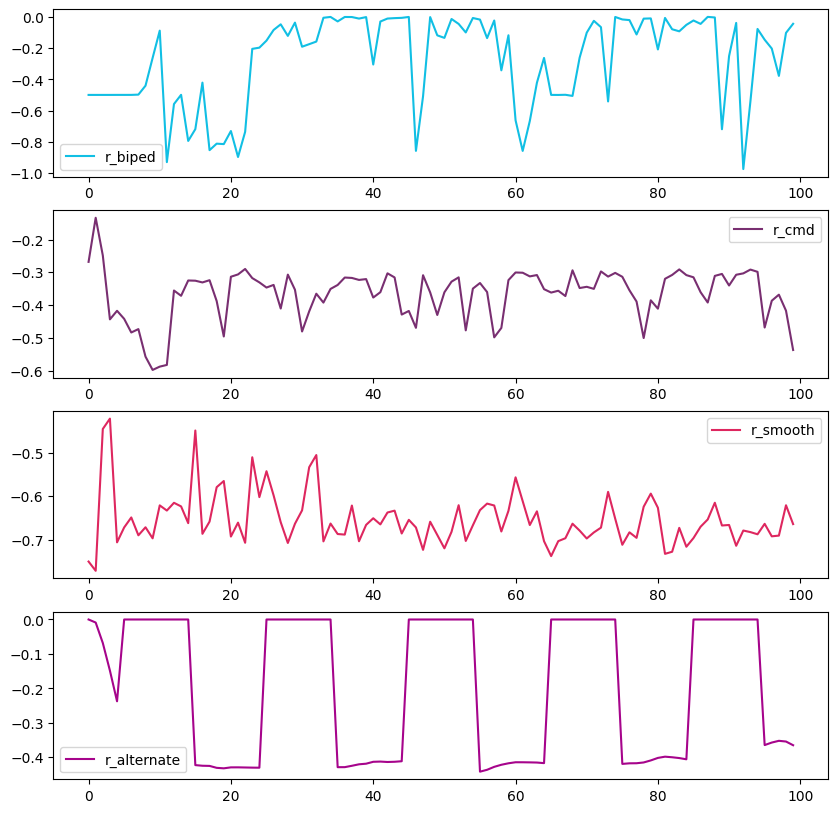

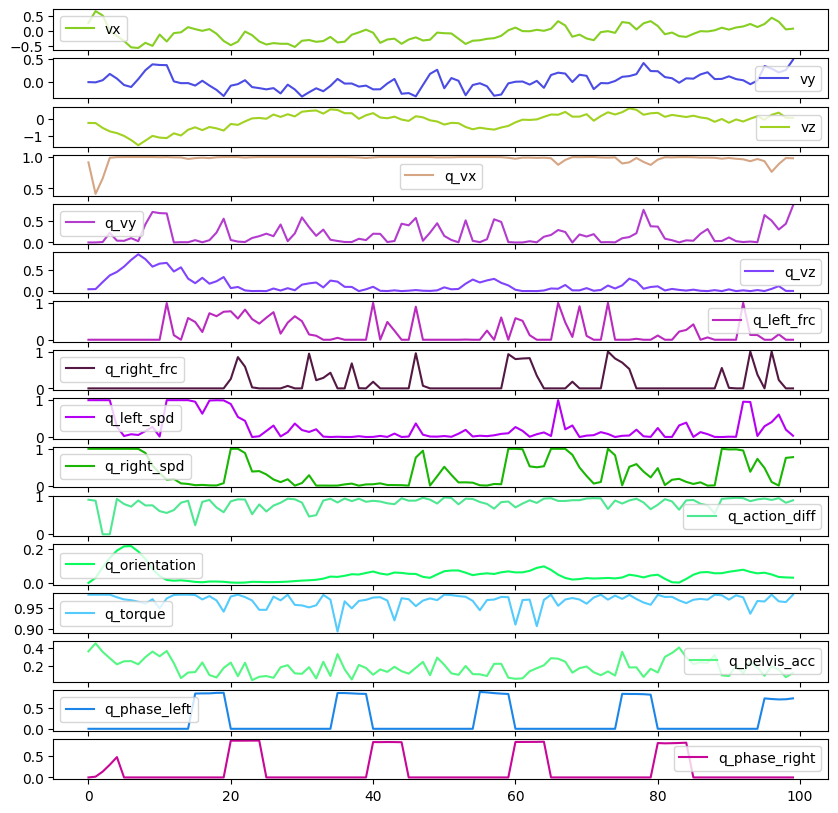

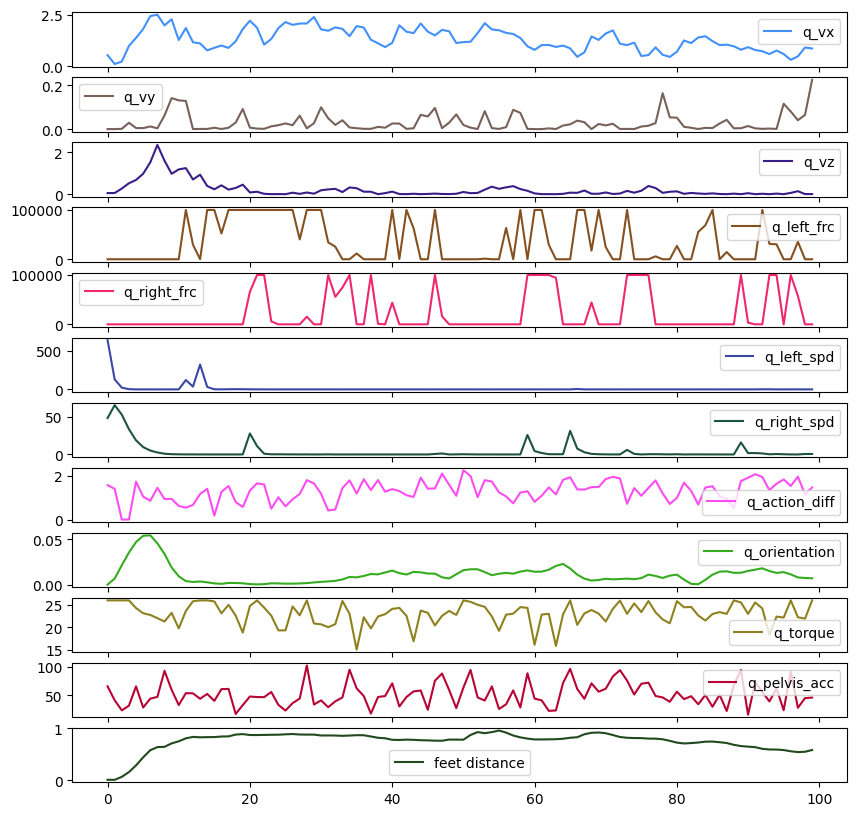

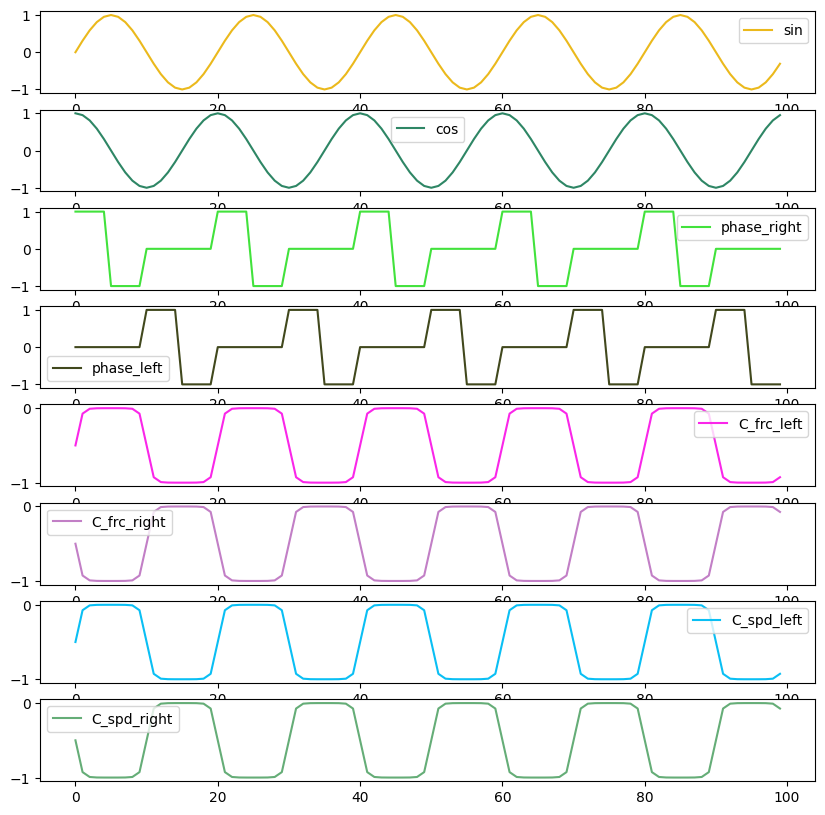

2023-05-29 05:24:19,388	WARNING worker.py:1986 -- A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: ffffffffffffffffb52985f1d2e683f09768a60301000000 Worker ID: bc97f01fa60776c489edbccf4e6d6be4cb2148abf237cb4f41aaa42d Node ID: a3e3043f573f7dde5ab6840a627a224bcfc793802d8fdfd754ba88ec Worker IP address: 127.0.0.1 Worker port: 57620 Worker PID: 2072 Worker exit type: SYSTEM_ERROR Worker exit detail: Worker unexpectedly exits with a connection error code 10054. An existing connection was forcibly closed by the remote host. There are some potential root causes. (1) The process is killed by SIGKILL by OOM killer due to high memory usage. (2) ray stop --force is called. (3) The worker is crashed unexpectedly due to SIGSEGV or other unexpected errors.
(pid=9556) c:\Users\Ajvendetta\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\tune\logger\tensorboardx.py:35: DeprecationWa

(RolloutWorker pid=9556) Device is  cuda
(RolloutWorker pid=9556) healthy z range:  (0.55, 2.0)


In [192]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv({})
obs,_ = env.reset(seed = np.random.randint(0,1000))
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
rewards = {}
foot_pos = []
filterfn = trainer.workers.local_worker().filters["default_policy"]
C = {}
exponents = {}
max_steps = 100
number_of_rounds = 4
force_squared = []
for i in range(max_steps):
    
    obs = filterfn(obs)
    action = trainer.compute_single_action(obs)
    obs, reward, terminated, _, info = env.step(action)
    foot_pos.append(env.data.xpos[13,2])
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
    for reward,value in info['custom_rewards'].items():
        if reward not in rewards.keys():
            rewards[reward] = [value]
        else:
            rewards[reward].append(value)
    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)
    if(env.exponents['q_left_frc']>0):
 
        force_squared.append(env.exponents['q_left_frc'])
env.close()
#save video 
media.show_video( frames, fps=30)

#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(12, 1, figsize=(10, 10))

axs[0].plot(rewards["r_biped"],color = np.random.rand(3,))
axs[0].legend(["r_biped"])
axs[1].plot(metrics["q_left_frc"],color = np.random.rand(3,))
axs[1].legend(["q_left_frc"])
axs[2].plot(metrics["q_right_frc"],color = np.random.rand(3,))
axs[2].legend(["q_right_frc"])
axs[3].plot(metrics["q_left_spd"],color = np.random.rand(3,))
axs[3].legend(["q_left_spd"])
axs[4].plot(metrics["q_right_spd"],color = np.random.rand(3,))
axs[4].legend(["q_right_spd"])
axs[5].plot(C["C_frc_left"],color = np.random.rand(3,))
axs[5].legend(["C_frc_left"])
axs[6].plot(C["C_frc_right"],color = np.random.rand(3,))
axs[6].legend(["C_frc_right"])
axs[7].plot(C["C_spd_left"],color = np.random.rand(3,))
axs[7].legend(["C_spd_left"])
axs[8].plot(C["C_spd_right"],color = np.random.rand(3,))
axs[8].legend(["C_spd_right"])
axs[9].plot(foot_pos)
axs[9].legend(["foot_pos"])
axs[10].plot(metrics["q_phase_left"])
axs[10].legend(["q_phase_left"])
axs[11].plot(metrics["q_phase_right"])
axs[11].legend(["q_phase_right"])
plt.show()

fig, axs = plt.subplots(len(rewards.keys()), 1, figsize=(10, 10))
print("Left_Force mean " ,np.mean(force_squared), "Std" , np.std(force_squared), "max", np.max(force_squared), "min", np.min(force_squared))
for i, metric in enumerate(rewards.keys()):
    # if(metric == "r_biped"):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(rewards[metric], color=s)
    axs[i].legend([metric])
    
plt.show()
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):

    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(C[metric], color=s)
    axs[i].legend([metric])





In [14]:
cassie.reset()

first_values=[]
for i in range(200):
    cassie.step(np.zeros(10,) )
    print(len([x for x in cassie.data.cfrc_ext if np.linalg.norm(x)>0.0]))
    if(cassie.exponents["q_right_frc"]>0 or cassie.exponents["q_left_frc"]>0):
        print("i : ", i)
        force = cassie.exponents["q_right_frc"] if cassie.exponents["q_right_frc"]>0 else cassie.exponents["q_left_frc"]
        print("FRC_"+ "right" if cassie.exponents["q_right_frc"]>0 else cassie.exponents["q_left_frc"] , force)
                
        # print(cassie.data.cfrc_ext[1])
        # print(cassie.data.cfrc_ext[4])
    
        #look for the closest value to the force in the external forces

        
    print([np.round(np.linalg.norm(cassie.data.cfrc_ext[j]),2) for j in range(len(cassie.data.cfrc_ext))])

    # if(i==0):
    #     first_values = deepcopy(cassie.data.cfrc_ext)
    # else: 
    #     for j in range(len(first_values)):
    #         if(np.linalg.norm(cassie.data.cfrc_ext[j]-first_values[j])!=0):
    #             print(j, np.linalg.norm(cassie.data.cfrc_ext[j]), np.linalg.norm(first_values[j]))

8
[0.0, 0.0, 0.0, 0.0, 0.0, 29.2, 0.0, 0.0, 0.0, 0.0, 29.2, 0.0, 110.2, 110.16, 0.0, 0.0, 0.0, 6.69, 0.0, 0.0, 0.0, 0.0, 6.69, 0.0, 92.63, 92.61]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 47.69, 0.0, 0.0, 0.0, 0.0, 47.69, 0.0, 41.92, 41.92, 0.0, 0.0, 0.0, 64.85, 0.0, 0.0, 0.0, 0.0, 64.85, 0.0, 40.28, 40.27]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 9.02, 0.0, 0.0, 0.0, 0.0, 9.02, 0.0, 20.23, 20.22, 0.0, 0.0, 0.0, 15.73, 0.0, 0.0, 0.0, 0.0, 15.73, 0.0, 19.98, 19.98]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 46.52, 0.0, 0.0, 0.0, 0.0, 46.52, 0.0, 81.44, 81.44, 0.0, 0.0, 0.0, 59.32, 0.0, 0.0, 0.0, 0.0, 59.32, 0.0, 81.87, 81.87]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 5.53, 0.0, 0.0, 0.0, 0.0, 5.53, 0.0, 225.57, 225.57, 0.0, 0.0, 0.0, 2.28, 0.0, 0.0, 0.0, 0.0, 2.28, 0.0, 229.17, 229.17]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 12.02, 0.0, 0.0, 0.0, 0.0, 12.02, 0.0, 274.81, 274.81, 0.0, 0.0, 0.0, 17.08, 0.0, 0.0, 0.0, 0.0, 17.08, 0.0, 279.49, 279.49]
8
[0.0, 0.0, 0.0, 0.0, 0.0, 3.49, 0.0, 0.0, 0.0, 0.0, 3.49, 0.0, 270.06, 270.06, 0.0, 0.0, 0.0, 1.76, 0.0, 

healthy z range:  (0.55, 2.0)


""

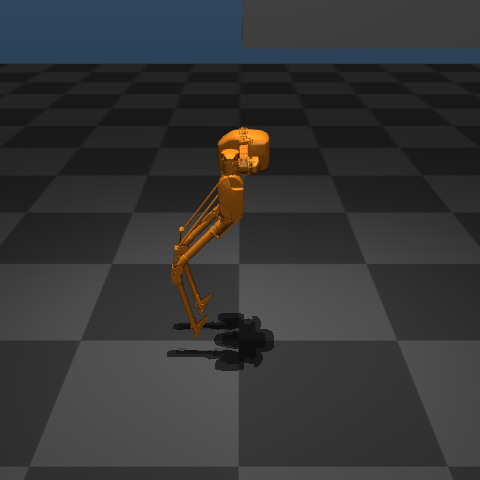

In [15]:
cassie = CassieEnv({})
cassie.render_mode = "rgb_array"
cassie.reset()
media.show_image(cassie.render())

In [16]:
cassie.data.qpos

array([ 7.65510560e-03,  8.56912834e-03,  1.01617043e+00,  9.99958581e-01,
        2.90918709e-03, -8.32160158e-03, -2.26347444e-03, -7.38372398e-03,
        2.49093768e-03,  9.18440876e-03,  9.99949721e-01,  6.59322609e-03,
        7.19430197e-03,  2.30806850e-03, -7.78757551e-01, -7.81293325e-03,
        1.02139357e+00, -4.23470756e-03,  8.74590446e-03,  2.72886659e-03,
       -9.41200691e-03,  2.36859156e-03,  7.07211625e-03,  3.56220778e-03,
        9.99940346e-01, -1.39451990e-03, -6.87071617e-03, -8.37571206e-03,
       -7.88212301e-01, -9.25321105e-04,  1.01530628e+00, -7.51255752e-03,
       -7.72409206e-03,  6.22948850e-03, -4.25895300e-03])

In [17]:
x = cassie.data.qpos

#find values that are equal in absolute value
for i in range(len(x)):
    for j in range(len(x)):
        if(i!=j):
            if(np.abs(np.abs(x[i])-np.abs(x[j]))<0.0000001):
                print(i,j, x[i], x[j])

In [18]:
import mujoco as m

In [19]:
cassie.reset()
cassie.render_mode = "rgb_array"
frames = []

feet_in_contact = []
for i in range(200):
    cassie.step(np.zeros(10,)) 
    # print('number of contacts', cassie.data.ncon)
    contacts = [contact.geom2 for contact in cassie.data.contact]
    if( 49 in contacts):
        print(contacts.index(49))
        contact_force_left_foot = np.zeros(6)
        m.mj_contactForce(cassie.model, cassie.data, contacts.index(49), contact_force_left_foot)
        print(contact_force_left_foot)
    if(33 in contacts):
        print(contacts.index(33))
        contact_force_right_foot = np.zeros(6)
        m.mj_contactForce(cassie.model, cassie.data, contacts.index(33), contact_force_right_foot)
        print(contact_force_right_foot)
    # if( 49 in contacts):
    #     if("Right" not in feet_in_contact):
    #         feet_in_contact.append("Right")
    # else:
    #     if("Right" in feet_in_contact):
    #         feet_in_contact.remove("Right")
    #     # print('LEFT_FOOT',end=" ")
    # if(33 in contacts):
    #     if("Left" not in feet_in_contact):
    #         feet_in_contact.append("Left")
    # else:
    #     if("Left" in feet_in_contact):

    # feet_in_contact.remove("Left")
    # print(feet_in_contact)
    # # Feet Contact Forces

    # contact_force_left_foot = np.zeros(6)
    # m.mj_contactForce(cassie.model, cassie.data, 1, contact_force_left_foot)
    # frames.append(cassie.render())

media.show_video( frames, fps=10)

1
[267.50337822  -7.58963947   2.42119828   0.           0.
   0.        ]
0
[207.29998925 -10.90583735   5.38931581   0.           0.
   0.        ]
1
[220.4286669   61.02097044   0.45937776   0.           0.
   0.        ]
0
[208.59908064  79.57907755   2.73375258   0.           0.
   0.        ]
1
[155.77958942  78.95437821   1.26340767   0.           0.
   0.        ]
0
[145.44863296  74.33376867   1.84768571   0.           0.
   0.        ]
1
[115.96392623  55.26605146   0.4750287    0.           0.
   0.        ]
0
[107.28593397  48.57064164   2.03283188   0.           0.
   0.        ]
1
[62.20319945 24.52044929 -0.22783948  0.          0.          0.        ]
0
[51.5773525  19.72231484  1.35500577  0.          0.          0.        ]
1
[ 3.25346825 -2.93961669 -0.31385157  0.          0.          0.        ]
0
[ 6.20098532 -6.20098532  0.          0.          0.          0.        ]
1
[176.935315   -64.26866136  -2.84919947   0.           0.
   0.        ]
0
[ 91.22731369 -33.1

StopIteration: 

In [ ]:
33 droite 
49 gauche

In [ ]:
cassie = CassieEnv({})

In [ ]:
cassie.reset()

(array([0.44575566, 0.48451298, 0.42773367, 0.82039203, 1.10539613,
        0.50160211, 0.25078245, 0.9969476 , 0.54002505, 0.53606454,
        0.42506289, 0.8283584 , 1.13692399, 0.49771123, 0.25376974,
        0.99830839, 0.50013509, 0.44221191, 0.4481156 , 0.99997861,
        0.49638655, 0.50052249, 0.49716093, 0.        , 1.        ]),
 {})

In [ ]:
right 25
left 13

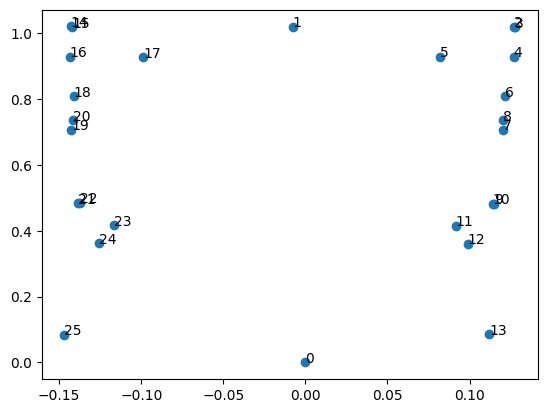

In [ ]:

cassie.step(np.zeros(10,))
z = cassie.data.xpos[:,2]
y = cassie.data.xpos[:,1]

plt.scatter(y,z)
#add labels to the points
for i in range(len(y)):
    plt.annotate(i, (y[i], z[i]))

[0.         1.09022419 1.07732669 1.03906533 0.96412992 0.96230848
 0.86978529 0.77551375 0.80950842 0.71962183 0.70344841 0.65612958
 0.60631375 0.43567658 1.1260785  1.08781714 1.01269804 1.01558246
 0.89683922 0.79472483 0.82320326 0.55517797 0.56902428 0.50005364
 0.45421224 0.1497775 ]


""

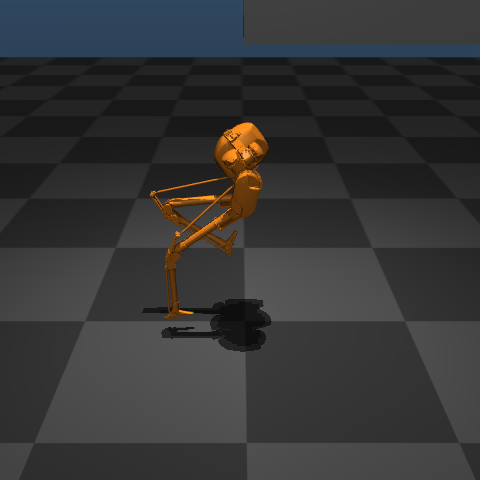

[0.         1.07403522 1.05755235 1.01917862 0.94492291 0.94422086
 0.85139783 0.76165041 0.7963343  0.73154827 0.71255129 0.67136636
 0.62441249 0.47867172 1.11354232 1.0751686  0.99993873 1.00466394
 0.88288568 0.78129124 0.81049602 0.54361243 0.55554781 0.48747718
 0.44094286 0.13698436]
[ 0 25 24 13 23 21 22 12 11 10  9  7 19  8 20  6 18  5  4 16 17  3  2  1
 15 14]
[15 16 14 22 18 21 20 19 24 23 17 25  1  0  5 11 12  6  8  7  3 10  4  9
 13  2]
[10 24  9 23 25 22 11 12 21 13  3 20 15  5  4  2  1 19 18  8  7 17  0 16
 14  6]


In [ ]:
print(cassie.data.xpos[:,2])
cassie.step(cassie.action_space.sample())
media.show_image(cassie.render())
print(cassie.data.xpos[:,2])

print(np.argsort(cassie.data.xpos[:,2]))
print(np.argsort(cassie.data.xpos[:,1]))
print(np.argsort(cassie.data.xpos[:,0]))

In [ ]:
len(cassie.data.sensordata)

29